# Predicting Car Prices
Using machine learning, specifically the k-nearest neighbors algorithm, to predict a car's market price using its attributes

## Part I - Introduction to the Data Set

Read imports-85.data into a dataframe named cars. If you read in the file using pandas.read_csv() without specifying any additional parameter values, you'll notice that the column names don't match the ones in the dataset's documentation. Why do you think this is and how can you fix this?
- Because there is no headers in the dataset and the way to fix it is to manually add the names of the columns in the names option of the pandas.read_csv() function. Specifying the column names will convert the header aquisition default of row 0 to none. Headers can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile)

Display the first few rows of the dataframe and make sure it looks like the data set preview.

In [1]:
import pandas as pd

col_names=\
['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors',
'body_style','drive_wheels','engine_location','wheel_base','length','width',
'height','curb_weight','engine_type','num_of_cylinders','engine_size',
'fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm',
'city_mpg','highway_mpg','price']


cars_og=pd.read_csv('imports-85.data',names=col_names)
cars=cars_og.copy()
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Determine which columns are numeric and can be used as features and which column is the target column.

- **All numeric columns:**<br>
symboling, normalized_losses, num_of_doors, wheel_base, length, width,
height, curb_weight, num_of_cylinders, engine_size, bore, stroke,
[compression_ratio](https://jalopnik.com/heres-what-compression-ratio-actually-means-and-why-it-1819723873), horsepower, peak_rpm, city_mpg, highway_mpg, price
- **Non-continuous:**<br>
symboling,num_of_doors,num_of_cylinders
- **Hypothesized most relevant features for predicting price**<br>
normalized_losses, city_mpg, highway_mpg, horsepower, num_of_cylinders,  peak_rpm, 
- **Target column:**<br> price

In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [3]:
col_numeric_names=\
['symboling','normalized_losses','num_of_doors','wheel_base','length',
 'width','height','curb_weight','num_of_cylinders','engine_size','bore',
 'stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

col_numeric_numeric_type_names=\
['symboling','wheel_base','length','width','height','curb_weight',
 'engine_size','compression_ratio','city_mpg','highway_mpg']

col_numeric_but_object_type_names=\
['normalized_losses','num_of_doors','num_of_cylinders','bore','stroke',
 'horsepower','peak_rpm','price']

cars.loc[:,col_numeric_but_object_type_names].head()

,normalized_losses,num_of_doors,num_of_cylinders,bore,stroke,horsepower,peak_rpm,price
0,?,two,four,3.47,2.68,111,5000,13495
1,?,two,four,3.47,2.68,111,5000,16500
2,?,two,six,2.68,3.47,154,5000,16500
3,164,four,four,3.19,3.40,102,5500,13950
4,164,four,five,3.19,3.40,115,5500,17450


**From numeric columns that are object types:**<br>
- Integer type: normalized_losses, horsepower, peak_rpm and price
- Float type: bore and stroke
- String type: num_of_doors and num_of_cylinders

## Part II - Data Cleaning
To use feature in predictive modeling can't have any missing values. To prevent any feature from having too much of an effect on the error metric calculation going to rescale, or normalize, the values in the numeric columns so they all range from 0 to 1

*Note:* This solution and the key will differ because here all the numeric columns were converted a numeric type, but in the key these columns were omitted: symboling, num_of_doors, num_of_cylinders and engine_size

#### Convert All Numeric Columns to Numeric Types

In [4]:
import numpy as np
cars=cars.replace('?',np.nan)

object_type_excluding_written =['normalized_losses','bore','stroke',
 'horsepower','peak_rpm','price']

#int didn't work because of np.nan values therefore used float - https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int
cars[object_type_excluding_written]=\
    cars[object_type_excluding_written].astype(float)

In [5]:
def writtentoint(element):
    written=['two','three','four','five','six','eight','twelve']
    actual=[2,3,4,5,6,8,12]
    if element=='four':
        return 4
    elif element=='six':
        return 6
    elif element=='five':
        return 5
    elif element=='eight':
        return 8
    elif element=='two':
        return 2
    elif element=='twelve':
        return 12
    elif element=='three':
        return 3
cars['num_of_cylinders']=cars['num_of_cylinders'].apply(writtentoint)        
cars['num_of_cylinders']=cars['num_of_cylinders'].astype(float)

In [6]:
def writtentoint2(element):
    written=['two','four']
    actual=[2,4]
    if element=='four':
        return 4
    elif element=='two':
        return 2
cars['num_of_doors']=cars['num_of_doors'].apply(writtentoint2)        
cars['num_of_doors']=cars['num_of_doors'].astype(float)

In [7]:
cars_num = cars[col_numeric_names]

#### Dealing with Missing Values
Determine how you should handle columns with missing values. You could:
- Replace the missing values using the average values from that column.
- Drop the rows entirely (especially if other columns in those rows have missing values).
- Drop the column entirely.

In [8]:
cars_num.isnull().sum()

symboling             0
normalized_losses    41
num_of_doors          2
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
num_of_cylinders      0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Dropped the rows with no prices, because can not use those rows as target values

In [9]:
cars_num=cars_num.dropna(subset=['price'])

Can't delete all rows with missing values because that would account for around 20% of the rows, which is quite large and certain columns should not be dropped because they are relevant features, so will take the average

The normalized_losses column has the highest number of null values, so we will take a look into the distribution

35.33394691904725
122.0


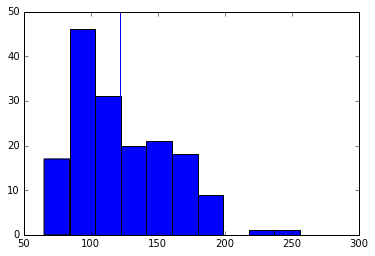

In [10]:
notnullnormalizedlosses=cars_num[cars_num['normalized_losses'].notnull()]['normalized_losses']
print(np.std(notnullnormalizedlosses))
print(np.mean(notnullnormalizedlosses))

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(notnullnormalizedlosses)
plt.axvline(np.mean(notnullnormalizedlosses))

We will replace missing values with the mean of the column

In [11]:
cars_num = cars_num.fillna(cars_num.mean())

#### Normalizing Numeric Columns except Target Column from Range of 0 to 1

In [12]:
#Normalize columns of pandas dataframe - https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame/48651066
norm = cars_num.copy()
norm = (norm-norm.min())/(norm.max()-norm.min())
norm['price'] = cars_num['price']

In [13]:
norm.head()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Part III - Univariate Model

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(training_col,target_col,df):
    np.random.seed(1) #if don't do this get different rmse value for every run
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    index_fifty = int(shuffled_df.shape[0]/2)
    train = shuffled_df[:index_fifty]
    test = shuffled_df[index_fifty:]
    knn = KNeighborsRegressor()
    knn.fit(train[[training_col]],train[target_col])
    predictions = knn.predict(test[[training_col]])
    rmse = mean_squared_error(test[target_col],predictions)**0.5
    return rmse

In [15]:
col_rmse_list=list()
for cols in col_numeric_names: 
    col_rmse_list.append(knn_train_test(cols,'price',cars_num))
rmse = pd.Series(col_rmse_list,index=col_numeric_names)
rmse_sorted=rmse.sort_values(ascending=False)

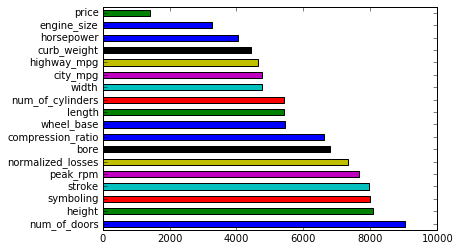

In [16]:
rmse_sorted.plot.barh()

Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
- When the default k value (number of nearest neighbors) is used, the numeric column with the lowest root mean squared error metric is engine size

In [17]:
def knn_train_testK(training_col,target_col,df,k):
    np.random.seed(1) #if don't do this get different rmse value for every run
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    index_fifty = int(shuffled_df.shape[0]/2)
    train = shuffled_df[:index_fifty]
    test = shuffled_df[index_fifty:]
    rmse_each_k = dict()
    for each_k in k:
        knn = KNeighborsRegressor(n_neighbors=each_k)
        knn.fit(train[[training_col]],train[target_col])
        predictions = knn.predict(test[[training_col]])
        rmse = mean_squared_error(test[target_col],predictions)**0.5
        rmse_each_k[each_k] = rmse
    return rmse_each_k

In [18]:
col_rmse_k_dict=dict()
for cols in col_numeric_names: 
    col_rmse_k_dict[cols] = knn_train_testK(cols,'price',cars_num,[1,3,5,7,9])
col_rmse_k_dict

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6795.388311535586,
  7: 6896.559499627726,
  9: 6882.822815090022},
 'city_mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4760.44984187731,
  7: 5218.847825621605,
  9: 5446.82446248222},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4445.141920375235,
  7: 4330.608104418053,
  9: 4632.92525121302},
 'engine_size': {1: 3258.4861059962027,
  3: 2951.5259704863593,
  5: 3271.449938331611,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8751.160007407449,
  3: 8121.165102604576,
  5: 8073.1197593196175,
  7: 7693.302663098179,
  9: 7776.396862418894},
 'highway_mpg': {1: 6025.594966720739,
  3: 4671.390389789466,
  5: 4643.046277675214,
  7: 4792.485755925797,
  9: 5227.337381566373},
 'horsepower': {1: 4170.054848037801,
  3: 4020.105451002

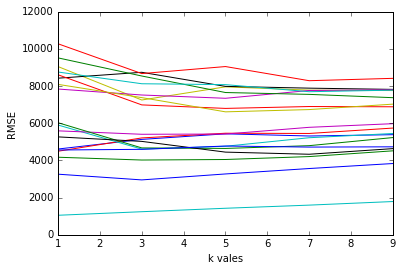

In [44]:
for key,value in col_rmse_k_dict.items():
    x=list(value.keys())
    y=list(value.values())
    x,y = zip(*sorted(zip(x, y)))
    plt.plot(x,y)
    #plt.legend(key)
plt.xlabel('k vales')
plt.ylabel('RMSE')
#Python's Matplotlib plotting in wrong order - https://stackoverflow.com/questions/37414916/pythons-matplotlib-plotting-in-wrong-order

## Part IV - Multivariate Model

In [20]:
def knn_train_testM(training_col,target_col,df):
    np.random.seed(1) #if don't do this get different rmse value for every run
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    index_fifty = int(shuffled_df.shape[0]/2)
    train = shuffled_df[:index_fifty]
    test = shuffled_df[index_fifty:]
    knn = KNeighborsRegressor()
    knn.fit(train[training_col],train[target_col])
    predictions = knn.predict(test[training_col])
    rmse = mean_squared_error(test[target_col],predictions)**0.5
    return rmse

For k=5 (default) from knn_train_test rmses are in list rmse_sorted

In [21]:
rmse_sorted=rmse_sorted.drop('price')

In [22]:
rmse_sorted=rmse_sorted.sort_values()

In [23]:
best2 = rmse_sorted[:2].index
best3 = rmse_sorted[:3].index
best4 = rmse_sorted[:4].index
best5 = rmse_sorted[:5].index

In [24]:
rmse_sorted

engine_size          3271.449938
horsepower           4048.437725
curb_weight          4445.141920
highway_mpg          4643.046278
city_mpg             4760.449842
width                4772.459149
num_of_cylinders     5417.206767
length               5428.810101
wheel_base           5460.851458
compression_ratio    6610.812153
bore                 6795.388312
normalized_losses    7339.675755
peak_rpm             7649.170564
stroke               7954.301034
symboling            7979.434920
height               8073.119759
num_of_doors         9045.589027
dtype: float64

In [25]:
bests=[best2,best3,best4,best5]
bests_rmses=[]
for best in bests:
    bests_rmses.append(knn_train_testM(best,'price',cars_num))

bests=pd.Series(bests)
bests_rmses=pd.Series(bests_rmses)
bests_rmses.index = bests
bests_rmses = bests_rmses.sort_values()
bests_rmses

[engine_size, horsepower]                                        2925.004646
[engine_size, horsepower, curb_weight]                           3864.067382
[engine_size, horsepower, curb_weight, highway_mpg]              3870.683880
[engine_size, horsepower, curb_weight, highway_mpg, city_mpg]    3870.683880
dtype: float64

Using the average rmse across k = [1,3,5,7,9] would yield the following list

In [26]:
features=[]
avgk=[]
for key,value in col_rmse_k_dict.items():
    features.append(key)
    vals=list(value.values())
    avgk.append(sum(vals)/len(vals))
features=pd.Series(features)
avgk=avgk=pd.Series(avgk)
avgk.index = features
avgk=avgk.drop('price').sort_values()
best2avg = avgk[:2].index
best3avg = avgk[:3].index
best4avg = avgk[:4].index
best5avg = avgk[:5].index

In [27]:
avgk

engine_size          3375.274641
horsepower           4191.699237
width                4674.698766
curb_weight          4739.056704
highway_mpg          5071.970954
length               5173.087449
city_mpg             5187.089230
wheel_base           5269.898315
num_of_cylinders     5632.714027
compression_ratio    7166.073599
bore                 7232.319720
normalized_losses    7649.281809
stroke               7955.585214
height               8083.028879
peak_rpm             8124.022815
symboling            8167.734209
num_of_doors         8935.924966
dtype: float64

In [28]:
bestsavg=[best2avg,best3avg,best4avg,best5avg]
bestsavg_rmses=[]
for best in bestsavg:
    bestsavg_rmses.append(knn_train_testM(best,'price',cars_num))
bestsavg=pd.Series(bestsavg)
bestsavg_rmses=pd.Series(bestsavg_rmses)
bestsavg_rmses.index = bestsavg
bestsavg_rmses = bestsavg_rmses.sort_values()
bestsavg_rmses

[engine_size, horsepower, width]                              2901.007255
[engine_size, horsepower]                                     2925.004646
[engine_size, horsepower, width, curb_weight]                 3864.067382
[engine_size, horsepower, width, curb_weight, highway_mpg]    3870.683880
dtype: float64

## Part V - Hyperparamaters Tuning
Optimize the model that performed the best in the previous step

For the top 3 models in the last step, going to vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values

Going to use the best 3 models that had used multiple features with the lowest average RMSE when k varried from 1 to 9

In [29]:
def knn_train_testT(training_col,target_col,df,k):
    np.random.seed(1) #if don't do this get different rmse value for every run
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    index_fifty = int(shuffled_df.shape[0]/2)
    train = shuffled_df[:index_fifty]
    test = shuffled_df[index_fifty:]
    rmse_each_k = dict()
    for each_k in k:
        knn = KNeighborsRegressor(n_neighbors=each_k)
        knn.fit(train[training_col],train[target_col])
        predictions = knn.predict(test[training_col])
        rmse = mean_squared_error(test[target_col],predictions)**0.5
        rmse_each_k[each_k] = rmse
    return rmse_each_k

Lowest three rmses were results of these 2,3 and 4 features

In [30]:
twof=['engine_size', 'horsepower']
threef=['engine_size', 'horsepower', 'width']
fourf=['engine_size', 'horsepower', 'width', 'curb_weight']
allf=[twof,threef,fourf]
top3rmse=dict()

for f in allf:
    top3rmse[tuple(f)] = \
    knn_train_testT(f,'price',cars_num,range(1,26))
top3rmse

{('engine_size', 'horsepower'): {1: 2832.6762159757077,
  2: 2592.760534757126,
  3: 2620.327691572396,
  4: 2824.6258095735284,
  5: 2925.00464591321,
  6: 3162.7465130445685,
  7: 3295.7806528253186,
  8: 3580.3376319325566,
  9: 3844.44037715117,
  10: 4066.955641740046,
  11: 4162.831387739917,
  12: 4250.9953344770765,
  13: 4288.279719198008,
  14: 4318.677524353425,
  15: 4384.634184404111,
  16: 4477.339380724929,
  17: 4542.7101905616355,
  18: 4675.594058904271,
  19: 4696.93629950144,
  20: 4684.844437694387,
  21: 4744.078137218994,
  22: 4779.969895724662,
  23: 4826.869687492047,
  24: 4881.349005863175,
  25: 4963.926213279482},
 ('engine_size', 'horsepower', 'width'): {1: 2861.158731550683,
  2: 2644.428153665928,
  3: 2681.7457878865184,
  4: 2722.280458854013,
  5: 2901.007254846714,
  6: 3079.0995987640463,
  7: 3210.5192759138426,
  8: 3485.8385181559474,
  9: 3782.798641745253,
  10: 4029.356670465123,
  11: 4133.471835231293,
  12: 4225.481801502254,
  13: 4232.57

[('engine_size', 'horsepower'),
 ('engine_size', 'horsepower', 'width', 'curb_weight'),
 ('engine_size', 'horsepower', 'width')]

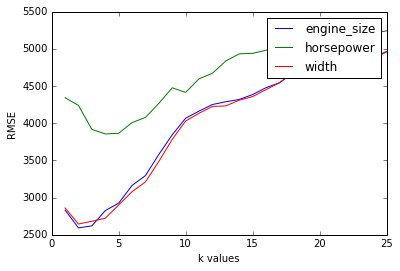

In [45]:
features_list=list()
min_value=list()
for key, value in top3rmse.items():
    features_list.append(key)
    ks = pd.Series(list(value.keys()))
    vals = pd.Series(list(value.values()))
    vals.index = ks
    val, idx = min((val, idx) for (idx, val) in enumerate(vals))
    min_value.append([idx,val])
    plt.plot(list(value.keys()),list(value.values()))
    plt.legend(key)
plt.xlabel('k values')
plt.ylabel('RMSE')
features_list    
#Python: Find index of minimum item in list of floats [duplicate] - https://stackoverflow.com/questions/13300962/python-find-index-of-minimum-item-in-list-of-floats

In [34]:
min_value

[[1, 2592.760534757126], [3, 3855.6983724555575], [1, 2644.428153665928]]

Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?
- For [('engine_size', 'horsepower')] optimal k value was 1 and the corresponding RMSE value of 2593
- For [(('engine_size', 'horsepower', 'width'))] optimal k value was 1 and the corresponding RMSE value of 2644
- For [('engine_size', 'horsepower', 'width', 'curb_weight')] optimal k value was 3 and the corresponding RMSE value of 3856

The best of the top three models is the one with 2 features and a k value of 1

With 2 and 3 features the trend follows quite closely, however with 4 features the model's trend does not resemble the model for 2 or 3 features, this could be due to the fact that the variance is negatively impacting the error metric and there needs to be more nearest neighbors to produce a better average. The problem with 2 or 3 features is that there is more bias, however it seems that an increase in features and nearest neighbors has a negative impact on the error metric, the root mean squared error in this case.

## Part VI - Next Steps
Ideas to explore if desired are:
- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation
- Modify the knn_train_test() function to perform the data cleaning as well